In [12]:
import pandas as pd
import seaborn as sns
from sqlalchemy import engine
from pandasql import sqldf

# Función lambda que hace escribir funciones en SQL mucho más fácil
pysqldf = lambda q: sqldf(q, globals())

### Análisis Exploratorio de Datos

In [2]:
df = pd.read_csv("datos_google_ads.csv")

In [3]:
df

,Keyword,Currency,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,...,Searches: Sep 2022,Searches: Oct 2022,Searches: Nov 2022,Searches: Dec 2022,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023
0,servicios financieros,ARS,880.0,0%,0%,Medium,36.0,24.57,480.39,NaN,...,880.0,880.0,880.0,720.0,880.0,720.0,880.0,1000.0,1000.0,1000.0
1,sector economico,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
2,sectores economicos,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
3,sector cuaternario,ARS,880.0,0%,0%,Low,0.0,NaN,NaN,NaN,...,880.0,1000.0,1300.0,390.0,50.0,260.0,1000.0,1300.0,1600.0,1300.0
4,sector primario secundario y terciario,ARS,1000.0,0%,30%,Low,0.0,NaN,NaN,NaN,...,1000.0,1000.0,1600.0,720.0,90.0,390.0,1000.0,1300.0,1600.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,consultoria sector cuaternario,ARS,10.0,0%,∞,Low,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0
399,la economia primaria,ARS,10.0,∞,0%,Low,0.0,NaN,NaN,NaN,...,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,10.0
400,sector economico de claro,ARS,10.0,0%,-100%,Unknown,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
401,sector agropecuario economia,ARS,10.0,∞,0%,Low,0.0,NaN,NaN,NaN,...,10.0,10.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0


In [4]:
df.shape

(403, 26)

In [5]:
df.describe()

,Avg. monthly searches,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,Organic impression share,Organic average position,In account?,In plan?,Searches: Jul 2022,...,Searches: Sep 2022,Searches: Oct 2022,Searches: Nov 2022,Searches: Dec 2022,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023
count,376.000000,240.000000,110.000000,110.000000,0.0,0.0,0.0,0.0,0.0,376.000000,...,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,113.138298,26.166667,38.743545,319.398273,NaN,NaN,NaN,NaN,NaN,92.739362,...,112.606383,112.952128,125.159574,84.547872,84.175532,89.468085,130.132979,127.819149,140.292553,116.010638
std,458.770231,26.130453,35.709426,754.744091,NaN,NaN,NaN,NaN,NaN,415.741197,...,462.479825,458.961794,503.767117,381.102692,436.267638,420.783059,541.089995,540.896076,608.280786,481.952739
min,0.000000,0.000000,1.420000,4.280000,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,2.000000,9.952500,72.070000,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,17.000000,33.010000,139.105000,NaN,NaN,NaN,NaN,NaN,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,20.000000,42.250000,51.297500,247.842500,NaN,NaN,NaN,NaN,NaN,10.000000,...,20.000000,20.000000,20.000000,10.000000,10.000000,10.000000,20.000000,20.000000,20.000000,20.000000
max,5400.000000,100.000000,191.110000,5460.370000,NaN,NaN,NaN,NaN,NaN,5400.000000,...,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,6600.000000,5400.000000


In [6]:
df['Keyword'].duplicated().sum()

0

In [7]:
df = df.dropna(subset=['Competition (indexed value)'])

In [8]:
df = df.dropna(subset=['Top of page bid (low range)'])

In [9]:
df

,Keyword,Currency,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,...,Searches: Sep 2022,Searches: Oct 2022,Searches: Nov 2022,Searches: Dec 2022,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023
0,servicios financieros,ARS,880.0,0%,0%,Medium,36.0,24.57,480.39,NaN,...,880.0,880.0,880.0,720.0,880.0,720.0,880.0,1000.0,1000.0,1000.0
1,sector economico,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
2,sectores economicos,ARS,2400.0,-19%,0%,Low,0.0,10.59,76.88,NaN,...,2400.0,2400.0,3600.0,1600.0,210.0,1300.0,3600.0,3600.0,4400.0,2900.0
5,sectores de la economia,ARS,1000.0,-19%,-19%,Low,1.0,9.74,76.88,NaN,...,1000.0,880.0,1600.0,880.0,110.0,590.0,1600.0,1600.0,1600.0,1300.0
7,auditoria financiera,ARS,70.0,-22%,0%,Medium,37.0,34.67,132.17,NaN,...,70.0,70.0,70.0,40.0,40.0,40.0,90.0,90.0,90.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,gestión de activos financieros,ARS,10.0,0%,∞,Medium,60.0,54.64,1117.04,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
341,grupo financiero unión,ARS,20.0,0%,-50%,Medium,44.0,13.39,22.82,NaN,...,10.0,30.0,30.0,20.0,30.0,40.0,10.0,10.0,10.0,10.0
372,descuentos comerciales y financieros,ARS,10.0,-50%,-50%,Low,23.0,118.33,891.58,NaN,...,20.0,10.0,10.0,10.0,10.0,10.0,10.0,20.0,10.0,10.0
378,financiera credi ya,ARS,10.0,∞,∞,Medium,49.0,22.73,133.69,NaN,...,0.0,10.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0


In [10]:
df['Avg. monthly searches'].plot.hist

<bound method PlotAccessor.hist of <pandas.plotting._core.PlotAccessor object at 0x169a4e090>>

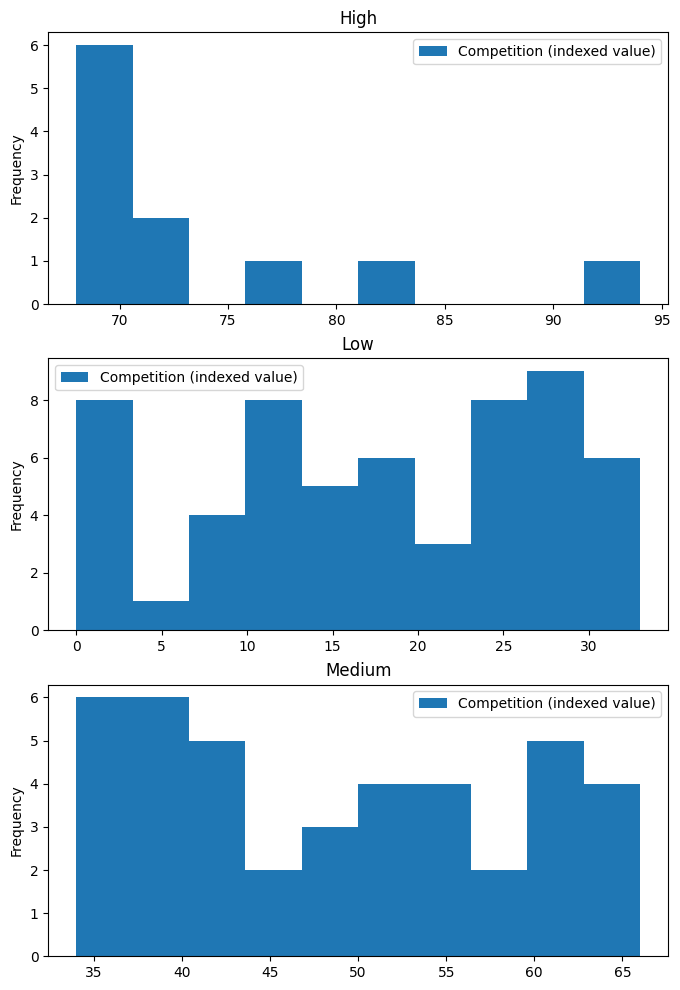

In [11]:
ax = df.plot.hist(column=["Competition (indexed value)"], by='Competition', bins=10, figsize=(8, 12))

<Axes: xlabel='Competition', ylabel='Avg. monthly searches'>

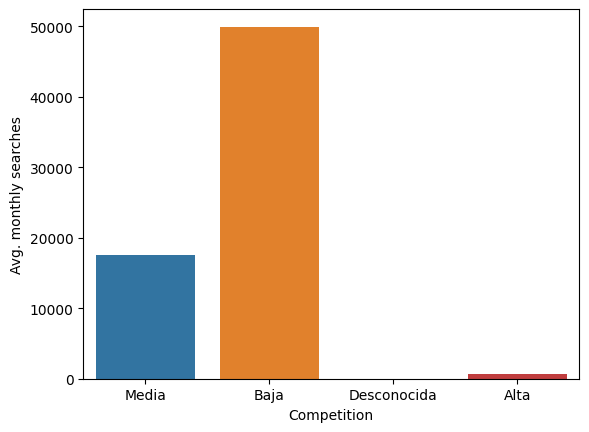

In [62]:
sns.barplot(data=df, x="Competition", y="Avg. monthly searches", errorbar=None, estimator=sum)

### Correr SQL en Python

In [13]:
df = df.rename(columns={"Avg. monthly searches": "avg_searches", "Competition (indexed value)": "competition_index"})

In [14]:
q = """ 
SELECT 
Keyword,
avg_searches,
Competition,
competition_index
FROM df
WHERE avg_searches >= 500
"""

df_export = pysqldf(q)

In [15]:
df_export.to_csv("datos_google_ads_procesados.csv")

In [16]:
df_export

,Keyword,avg_searches,Competition,competition_index
0,servicios financieros,880.0,Medium,36.0
1,sector economico,2400.0,Low,0.0
2,sectores economicos,2400.0,Low,0.0
3,sectores de la economia,1000.0,Low,1.0
4,entidades financieras,720.0,Low,25.0
5,economia informal,720.0,Low,1.0
6,financieros,4400.0,Medium,37.0
7,banco de servicios financieros,2900.0,Low,26.0
8,asesoria financiera,1900.0,Medium,61.0
9,servicio financiero carrefour,5400.0,Low,32.0
